In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
#https://github.com/mwv/zca
from zca.zca import zca
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import scipy
import numpy as np
import scipy.stats as st
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV

In [ ]:

exclude = 'States'
all_data = pd.read_csv('../data/raw/states.csv')

X = all_data[set(all_data.columns).difference([exclude])].copy()
display(X.describe())
X.index=all_data[exclude]
display(X)

In [ ]:
#integral of e^((-t^2)/2) from negative infinity to 11
#https://www.wolframalpha.com/input/?i=integral+of+e%5E%28%28-t%5E2%29%2F2%29+from+negative+infinity+to+11&fbclid=IwAR2734hgH3UpMEtt_A1JgWt7CrstT1QtHZm517HyqspNwMpwBZX3PmwdXos

#Use spyder
import math
from sympy import *
import scipy
import numpy as np


init_printing()
var('x,y')

x = 0
while x < np.inf:
    #print(x)
    x += 1
    if x == 11:

        break
else:
    y=math.e^(x^2/2)
    
integrate(y)

plot(integrate(y))


In [ ]:
def ecdf2(values):
        co = len(values)
        externalArray = pd.DataFrame()
        for d in range(0,len(values.columns)):
            internalArray = []
            for i in range(0,len(values.iloc[:,d])):
                a = ( \
                    sum( ( values.iloc[:,d] <= values.iloc[:,d][i] ) ) + \
                    sum( ( values.iloc[:,d] <  values.iloc[:,d][i] ) ) \
                    ) / 2 / co
                print(a)
                internalArray.append(a)

            externalArray = pd.concat([externalArray,pd.DataFrame(internalArray).round(2)],axis=1)

        return(externalArray)


In [ ]:
temp = np.array(range(0,10))#


In [224]:
from scipy.integrate import simps
from numpy import trapz

import numpy as np

def function(x):
    return x**2

x = [1,2,4]
y = [1,1,2]

print(x)
print(y)

# primitive :

#print("area: ", 1.0 / 3.0 * ( x[len(x)-1]**3 - x[0]**3 ))

# using Trapezoidal rule:

area = trapz(y,x)
print('area: ',area)

# using Simpson's rule:

area = simps(y,x,dx=1,axis=-1)
print('area: ',area)

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x, y)

0.0
0.2535804549283909
0.6750912664981746
0.5515304689693906
0.681830946363381
0.5609379387812412
0.6919404661611906
0.5710474585790508
0.7020499859590003
0.5804549283909014
0.8205560235888796
0.9491715810165683
0.9413086211738275
0.9316203313675933
0.9519797809604044
0.9442572311148553
0.9654591406908172
0.9584386408312271
0.9823083403538332
0.9786576804268463
1.0058972198820555


In [28]:
temp[0:2]

[1, 3]

In [35]:
simps(temp[0:4], dx=1)

53.25

0.0
1.0
2.0
3.4166666666666665
5.666666666666666
7.916666666666666
11.666666666666666
15.083333333333332
17.666666666666664
19.083333333333332
20.0
21.0
124.49999999999999
           0
0   0.000000
1   0.008032
2   0.024096
3   0.051539
4   0.097055
5   0.160643
6   0.254351
7   0.375502
8   0.517403
9   0.670683
10  0.831325
11  1.000000



,0
0,NaN
1,0.008032
2,0.008032
3,0.011379
4,0.018072
5,0.018072
6,0.030120
7,0.027443
8,0.020750
9,0.011379


,0
0,0.000000
1,0.008032
2,0.016064
3,0.027443
4,0.045515
5,0.063588
6,0.093708
7,0.121151
8,0.141901
9,0.153280


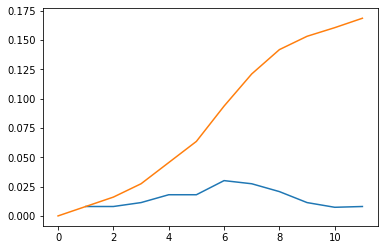

In [54]:
from __future__ import print_function
#http://hyperphysics.phy-astr.gsu.edu/hbase/Math/derint.html

import numpy as np
from scipy.integrate import simps
from numpy import trapz
import pandas as pd
import matplotlib.pyplot as plt

temp = [1,1,1,2,2,3,4,3,2,1,1,1]

#area2 = simps(temp[0:len(temp)], dx=1)

#print(area2)
data = []

s = np.sum(temp)

for i in range(1,len(temp)+1):
    integral = simps(temp[0:i], dx=1)
    #print(np.sum(temp[0:i]))
    print(integral)
    data.append(integral)
    
#print(data[-1])
    
print(np.sum(data))
#data = pd.DataFrame(np.cumsum(data)/np.sum(data))
data = pd.DataFrame(data/np.sum(data))
print(np.cumsum(data))

print()
display(data.diff())
plt.plot(data.diff())
display(data)

plt.plot(data)

In [238]:
print(np.mean(data))
print(np.median(data))

0    0.229517
dtype: float64
0.11494005533353827


In [ ]:
raw_pct

In [ ]:
#plt.plot(X['Poverty'].sort_values(kind="quicksort", ascending=True,key=abs))
bandwidths = np.linspace(.01, 4, 20)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                        {'bandwidth': bandwidths},
                        )

kde_pct = pd.DataFrame()
#raw_pct = pd.DataFrame()

#for i in X.columns:
i='Poverty'
print(i)
og = X[[i]].sort_values(kind="quicksort", by=i,ascending=True)
og = pd.DataFrame(temp)
raw_pct = ecdf2(og)
og_pct = og
grid.fit(og_pct)
print("bandwidth: " + str(grid.best_params_['bandwidth']))
kde = KernelDensity(bandwidth=grid.best_params_['bandwidth'], kernel='gaussian')
kde.fit(og_pct)
logprobX = np.cumsum(np.exp(kde.score_samples(og_pct)))/np.sum(np.exp(kde.score_samples(og_pct)))
logprobX = (pd.DataFrame(logprobX).shift(1).replace([np.inf, -np.inf, np.NaN], 0)+pd.DataFrame(logprobX))/2
logprobX.index = og.index
kde_pct = pd.concat([kde_pct,logprobX],axis=1)
#raw_pct = pd.concat([raw_pct,og_pct],axis=1)
display(st.norm.ppf(logprobX)[0])
display(st.norm.ppf(logprobX)[len(logprobX)-1])
display(X[[i]].min())
display(X[[i]].max())

data1 = raw_pct#np.exp(t)
data2 = logprobX#np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('index')
ax1.set_ylabel('raw', color=color)
ax1.plot(data1, color=color)
plt.xticks(rotation = 90,size=8)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('kde_pct', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



In [ ]:
import numpy as np
from sklearn.metrics import auc
from sklearn import metrics

dx = 5
#xx = np.arange(1,100,dx)
#yy = np.arange(1,100,dx)
xx = X['Poverty'].sort_values(kind="quicksort", ascending=True,key=abs)
yy = np.full((1,len(X)), 1).ravel()

print('computed AUC using sklearn.metrics.auc: {}'.format(auc(xx,yy)))
fpr, tpr, thresholds = metrics.roc_curve(xx, yy, pos_label=2)
auc(fpr, tpr)
#print('computed AUC using np.trapz: {}'.format(np.trapz(yy, dx = dx)))